In [1]:
# Bar charts for Qualitative variables
# In a qualitative bar chart - each categorical variable has a unique x position
# while the height of each bar illustrates the frequency or count 
# of the number of times a data point took on each categorical value
# For nominal data, you might want to arrange the bars in order of frequency with the most common on the left
# This makes it easy to see which category is the most common and how the rest of the categories compare
# HOWEVER, you should not be inclined to do this with ordinal data.
# The inherent order of the levels will usually be a more important feature to convey.
# It's most important to know if the most comman categories are lower or higher in the spectrum, 
# rather than jsut which label is the most frequent

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# a magic keyword used in Jupyter notebook to display visualizations inline within the notebook

In [29]:
pokemon  = pd.read_csv('./pokemon.csv')
print(pokemon.shape)
pokemon.tail()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79
806,807,zeraora,7,1.5,44.5,270,electric,NaN,88,112,75,143,102,80


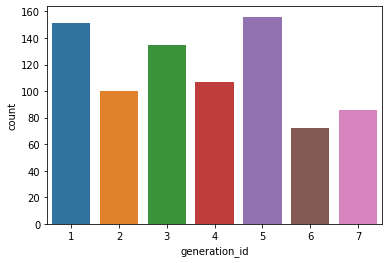

In [5]:
sb.countplot(data = pokemon, x = 'generation_id')

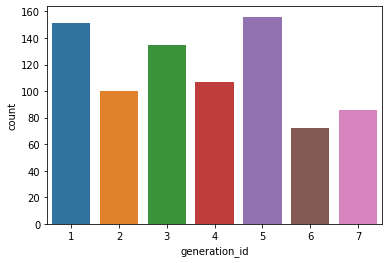

In [6]:
sb.countplot(data = pokemon, x = 'generation_id');
# semicolon here suppresses the printing of the object notation such as the one above call

In [7]:
sb.color_palette() # this function returns a list of tuples corresponding to the color pallet set in the function's arguments

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [9]:
base_color = sb.color_palette()[0]

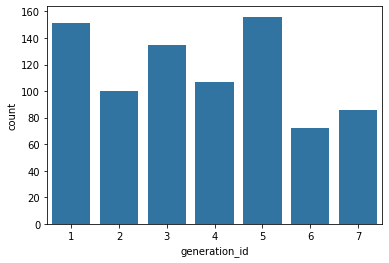

In [10]:
sb.countplot(data = pokemon, x = 'generation_id', color=base_color); # colors the bar chart with the single color

In [11]:
# below code orders or sorts the above x axis based on the max to min count in the y axis
pokemon['generation_id'].value_counts() # gets the count of values and sorts them in descending order

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [12]:
# in order to sort the bar graph though we need only the indices as below
gen_order = pokemon['generation_id'].value_counts().index
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

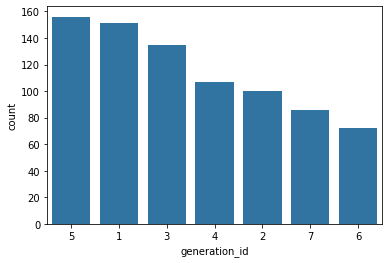

In [13]:
sb.countplot(data = pokemon, x = 'generation_id', color=base_color, order=gen_order); # sorts the bar chart

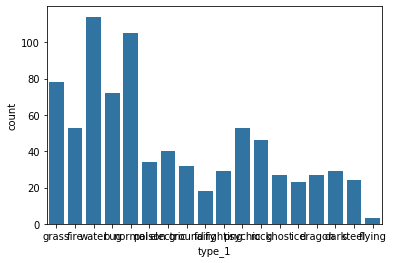

In [15]:
# plot a graph for pokemon type say 'type_1'
sb.countplot(data = pokemon, x = 'type_1', color=base_color);
# observe the labels along the x axis - they're completely cluttered 

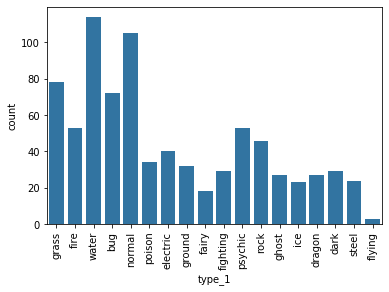

In [18]:
# the above cluttered x axis can be rotated using matplotlibs xticks function as below
# plot a graph for pokemon type say 'type_1'
sb.countplot(data = pokemon, x = 'type_1', color=base_color);
plt.xticks(rotation = 90); # this rorates the labels along the x axis by 90 degrees

# plt.xticks() # get the current tick locations and labels

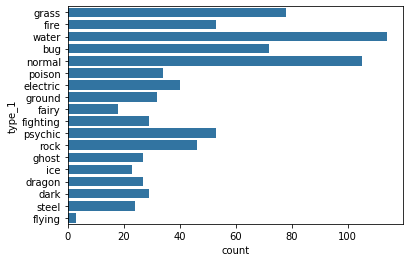

In [19]:
# an alternative to the above is to create an horital bar chart 
# and this is simply done by passing the qualitative variable to y instead of x
# plot a graph for pokemon type say 'type_1'
sb.countplot(data = pokemon, y = 'type_1', color=base_color);

In [21]:
# let's sort the above chart
type_order = pokemon['type_1'].value_counts().index
type_order

Index(['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock',
       'electric', 'poison', 'ground', 'fighting', 'dark', 'dragon', 'ghost',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

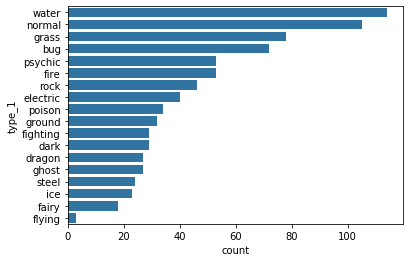

In [22]:
# plot a graph for pokemon type say 'type_1' and sort them by count of each type
sb.countplot(data = pokemon, y = 'type_1', color=base_color, order=type_order);

In [30]:
# Bar charts can be constructed for Relative Frequency as well
# Relative Frequency is based ont the proportion of the data that falls in each category
# data wrangling below
pkmn_types = pokemon.melt(id_vars = ['id', 'species'], value_vars = ['type_1', 'type_2'], var_name = ['type_level'], value_name='type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [31]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

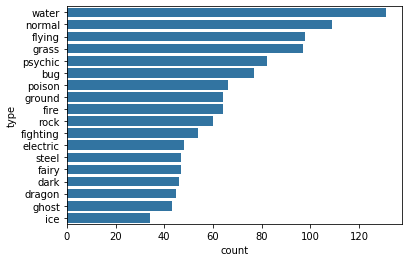

In [32]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [33]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [37]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

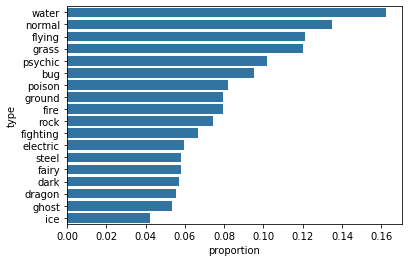

In [45]:
# relative / proportional bar chart
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('proportion');
# The xticks and yticks functions aren't only about rotating the tick labels. 
# You can also get and set their locations and labels as well. 
# The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts.
# The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

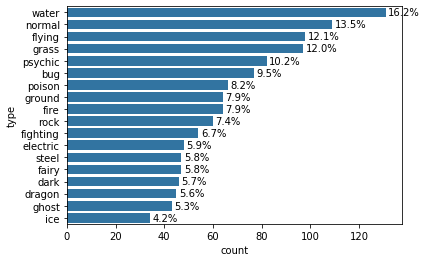

In [41]:
# relative / proportional bar chart
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')